In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Covid Data.csv", dtype={"SEX": str}, encoding="utf-8")
df.head(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
df.shape

(1048575, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  object
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [5]:

# Convert DATE_DIED to datetime, invalid dates will become Null
df["DATE_DIED"] = pd.to_datetime(df["DATE_DIED"], errors="coerce")

# Create binary column: DIED (1 if DATE_DIED is a valid date, else 0)
df["DIED"] = df["DATE_DIED"].notna().astype(int)

# Replace 97, 98, 99 with NaN (assumed as missing values)
df.replace([97, 98, 99], np.nan, inplace=True)

Group Age into Categories

In [8]:
bins = [0, 17, 30, 45, 60, 100]
labels = ["0–17", "18–30", "31–45", "46–60", "60+"]
df["AGE_GROUP"] = pd.cut(df["AGE"], bins=bins, labels=labels)


Visualization

Age Distribution

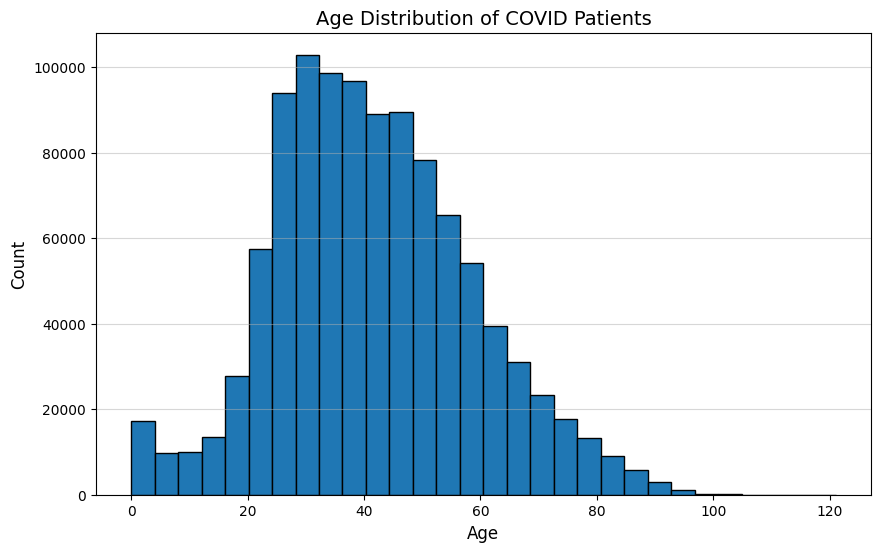

In [9]:
# Filter out missing ages
age_data = df['AGE'].fillna(0)

# Create the plot
plt.figure(figsize=(10, 6))
plt.hist(age_data, bins=30, edgecolor='black')

# Add labels and title
plt.title('Age Distribution of COVID Patients', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.5)

# Show the plot
plt.show()

Gender Distribution

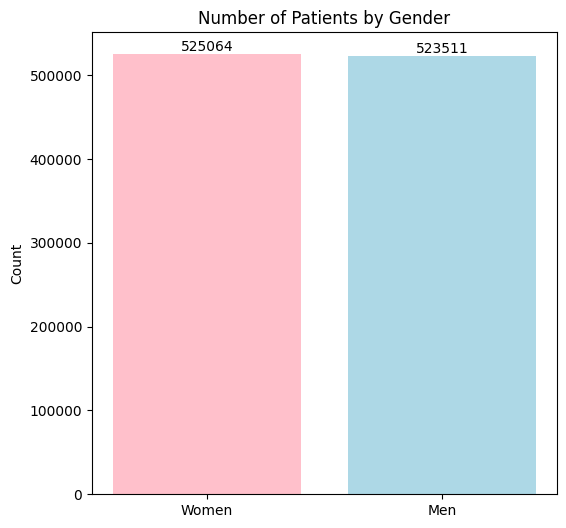

In [11]:
# Count males and females
gender_counts = df['SEX'].value_counts()

# Create labels
labels = ['Women', 'Men']  # Assuming 1=Male, 2=Female in your data

# Create the plot
plt.figure(figsize=(6, 6))
plt.bar(labels, gender_counts, color=['pink', 'lightblue'])

# Add numbers on top of bars
for i, count in enumerate(gender_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Number of Patients by Gender')
plt.ylabel('Count')
plt.show()

Deaths by Age Group

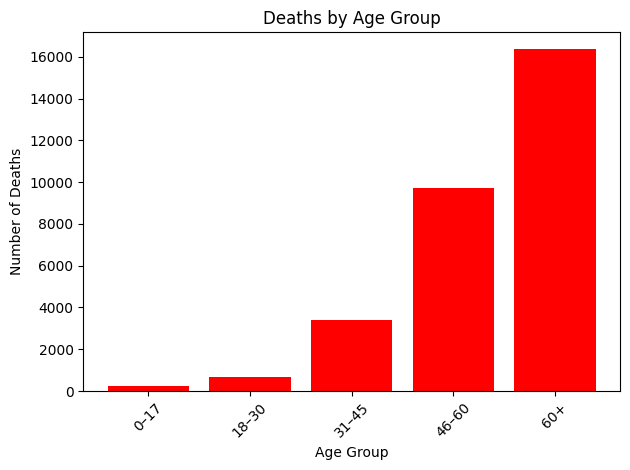

In [12]:
# Filter the data for deaths
death_data = df[df["DIED"] == 1]

# Count the number of deaths in each age group
age_group_counts = death_data["AGE_GROUP"].value_counts().sort_index()

# Plot using matplotlib
plt.bar(age_group_counts.index, age_group_counts.values, color='red')
plt.title("Deaths by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()       # Adjust layout to prevent label cutoff
plt.show()


ICU Admissions

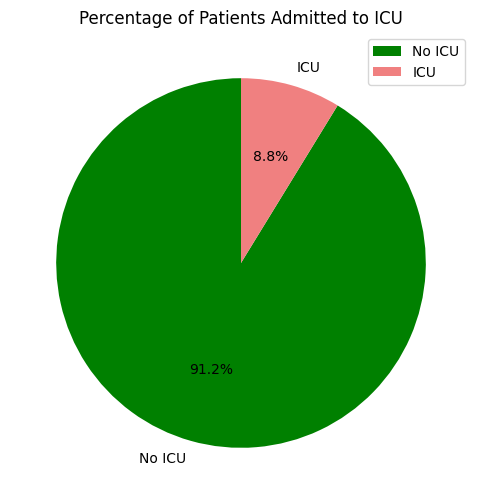

In [13]:
# Calculate ICU admission rate
icu_data = df.dropna(subset=['ICU'])
icu_rate = icu_data['ICU'].value_counts(normalize=True) * 100

# Create the plot
plt.figure(figsize=(6, 6))
plt.pie(icu_rate, labels=['No ICU', 'ICU'], autopct='%1.1f%%', 
        colors=['green', 'lightcoral'], startangle=90)
plt.title('Percentage of Patients Admitted to ICU')
plt.legend(loc='best')
plt.show()

Most Common Treatments

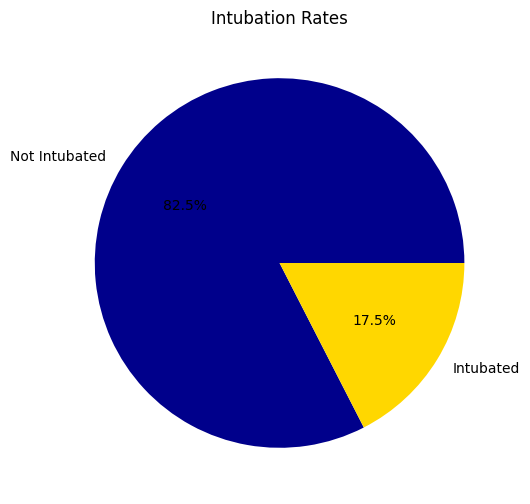

In [14]:
# Count treatments (example with intubation)
intubation_counts = df['INTUBED'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(intubation_counts, labels=['Not Intubated', 'Intubated'], 
        autopct='%1.1f%%', colors=['darkblue', 'gold'])
plt.title('Intubation Rates')
plt.show()

Weeky Deaths Over Time

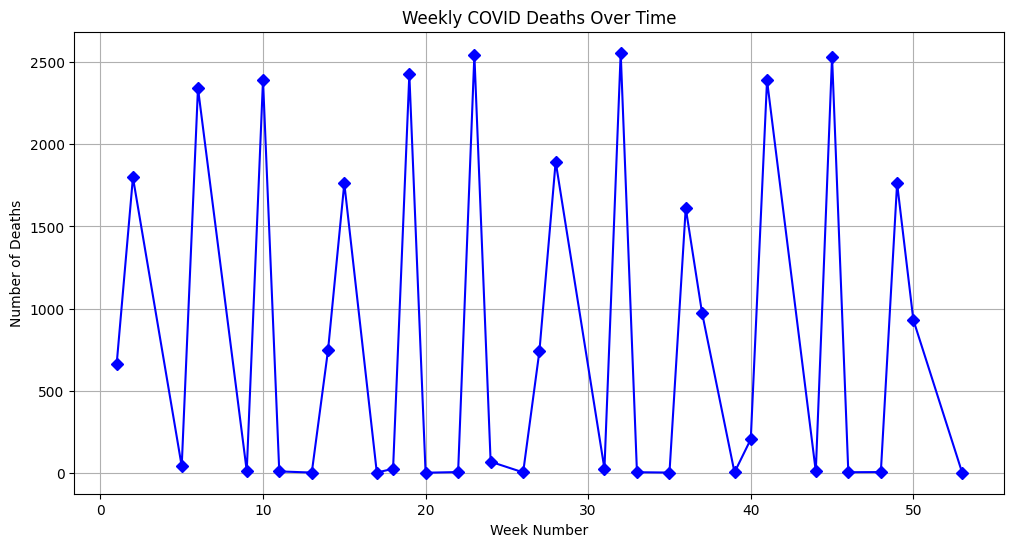

In [15]:
weekly_deaths = df[df['DIED'] == 1].groupby(
    df['DATE_DIED'].dt.isocalendar().week)['DIED'].count()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(weekly_deaths.index, weekly_deaths.values, marker='D', color='b')
plt.title('Weekly COVID Deaths Over Time')
plt.xlabel('Week Number')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()